- n = [800, 1200, 2000] / 400

- indp = N
- z_dis = gaussian, uniform
- noise_dis = gaussian, t, cauchy
- dz=1
- alpha=2

100%|██████████| 20/20 [02:12<00:00,  6.61s/it]


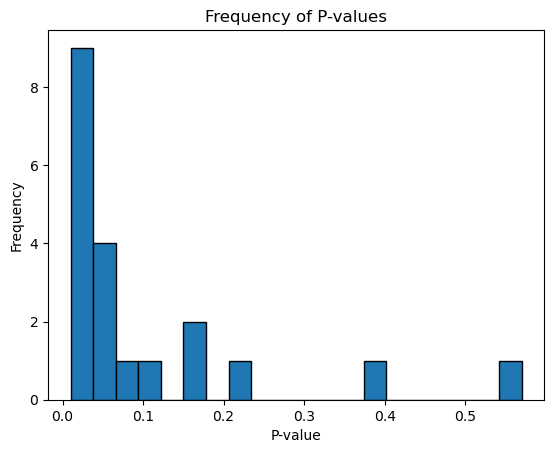

In [3]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from ecit import *


mvtnorm = importr('mvtnorm')
cdcsis = importr('cdcsis')

p_list = []
for i in tqdm(range(20), leave=True, dynamic_ncols=True):
    
    x, y, z = generate_samples(n=200)

    # 将 Python 数据转换为 R 对象
    x_r = ro.FloatVector(x)
    y_r = ro.FloatVector(y)
    z_r = ro.FloatVector(z)

    # 运行 cdcov.test
    result = ro.r['cdcov.test'](x_r, y_r, z_r)#, num_bootstrap=200)

    p_list.append(result[1])

p_values = [float(val[0]) for val in p_list]  # 提取每个 FloatVector 对象中的数值

# 绘制频率图（直方图）
plt.hist(p_values, bins=20, edgecolor='black')
plt.title('Frequency of P-values')
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.show()

100%|██████████| 50/50 [14:37<00:00, 17.54s/it]


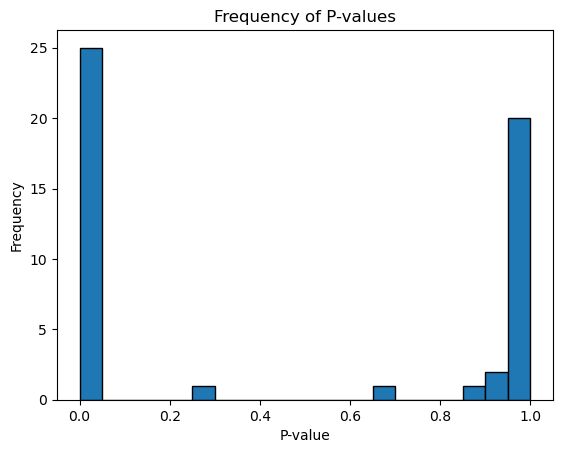

In [ ]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from ecit import *


p_list = []
for i in tqdm(range(50), leave=True, dynamic_ncols=True):
    
    dataI = np.hstack(generate_samples(n=100))
    
    obj_ECIT = ECIT(dataI, cmiknn, p_alpha2, 1)
    pI = obj_ECIT([0], [1], list(range(2,1+2)))

    p_list.append(pI)

p_values = p_list  # 提取每个 FloatVector 对象中的数值

# 绘制频率图（直方图）
plt.hist(p_values, bins=20, edgecolor='black')
plt.title('Frequency of P-values')
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.show()